Проект на стадии черновика

# План дальнейшей работы:
- Везде, где присутствуют числа, лучше делать визуализацию в дополнению к выводу точных значений или вместе с ними, в том числе сравнительную
- Как распределено число "больных" для различного стажа.
- Как связано то, что человек давал дополнительные комментарии - и болезни, диагностируемые по опросу
- Корреляция: сделать два столбца - "Болезнь", "Работа", заполнить 0 и 1, определить корреляцию между столбцами.
- Отношение рисков для трех факторов: работа, личные причины, учеба
- Потребность обращения к психиатру - корреляция с болезнью
- Посчитать корреляцию прочих вопросов со столбцами о работе
- Отдельный пункт о работе: 1) у тех, кто работал, а сейчас нет - посмотреть что было в прошлом (когда они работали и курсы, на которых проявлялись аспекты, связанные с неврозами) 2) Длительность симптомов как критерий (сколько человек указал курсов-лет)
- Рассчитать средний коэффициент корреляции по всем вопросам. Указать ссылки на опросы
- Статистическая проверка наличия корреляции - гипотеза, статстика критерия, критерий
- Использовать некоррелирующие вопросы как аргументацию выбора вопросов для разных шкал (!!)
- Использовать данные из дополнительных столбцов (курсы), в том числе не используется последний столбец, в котором содержатся тексты
- Рассчитаем средний коэффициент корреляции по всем вопросам

- На каких курсах хуже всего состояние студентов (учитывая текущее состояние и прошлое)?

Украшательства:
- Как меняется картина причин по курсам - визуализировать в виде гистограмм или подобного

# Невротические состояния студентов-медиков УДК 616.891

https://docs.google.com/document/d/1u0ZMpBkkHeRmtHJHG-jZns-cy9ylR0CVWxtVcfE_BqM/edit?usp=sharing - текстовый файл

**Актуальность исследования**: Отличительная черта студентов-медиков среди других специальностей – высокий процент работающих старшекурсников. В сочетании с интенсивной учебной нагрузкой трудовая занятость может влиять на психическое состояние студентов и вызывать невротические состояния. Также их развитию могут содействовать значительная длительность обучения и для многих студентов – трудность в выборе дальнейшей специализации из широкого спектра возможных вариантов.

**Цель**: Изучить распространенность и определить основные причины невротических состояний в среде студентов-медиков.

**Задачи**:
1. Провести скрининговый опрос студентов медицинских специальностей и контрольной группы студентов немедицинских специальностей.
2.   Провести статистическую обработку данных. 
3. Получить ответы на следующие вопросы относительно невротических состояний студентов-медиков: -какова их распространенность на различных этапах обучения? -каковы их основные причины? -каково влияние совмещения учебы с работой на их развитие?

**Методы исследования**: 
Для выявления невротических состояний в ноябре-декабре 2019 г. проведен опрос с помощью электронной формы из 83 вопросов модифицированного клинического опросника 1978 года К.К.Яхина и Д.М.Менделевича. 
В новой версии опросник содержит:

1) общую информацию о студенте (пол, возраст, учебное заведение, факультет, номер курса) и  вопросы: “Совмещаете ли вы учебу с работой?”, “На каких курсах Вы совмещали работу с учебой?”;  

2) 58 клинических вопросов, разделенных на 8 разделов (сон; концентрация, память, внимательность; боль и необычные физические ощущения; упадок сил, утомляемость, волевая дисфункция; плохое или неустойчивое настроение, подавленность, эмоции; тревога, беспокойство, сомнения; навязчивые мысли, действия и страхи; межличностные отношения). Предложенные ответы: “да” и “нет”, “в данный период времени нет, но раньше наблюдалось подобное”.  Каждый раздел включает еще по два дополнительных вопроса:  “На каких курсах Вы особенно часто сталкивались с данными проявлениями?”, “Что могло послужить этому причиной?”, на которые также предлагалось выбрать ответ из предложенных вариантов, но с возможностью внесения своего;

3) вопрос о потребности в  обращении за помощью к психиатру, психотерапевту и ее реализации;

4) возможность описать неучтенные мысли в свободной форме.

В опросе приняли участие 398 студентов-медиков из восьми медицинских ВУЗов (преимущественно СПбГПМУ) четырех факультетов: педиатрический, лечебное дело, стоматологический, медико-профилактическое дело. Опрос был также проведен в контрольной группе 79 студентов других специальностей. 

**Диагностические шкалы опросника**: тревожные расстройства, обсессивно-компульсивное расстройство, соматоформные расстройства, неврастения, тревожно-депрессивное расстройство.



*Примечание на полях*: отдельно стоит оговорить тот факт, что опрос проводился в интернете и добровольно. Студенты, добровольно вызвавшиеся участвовать в исследовании, могут не вполне полно отражать генеральную совокупность, так как обладают достаточным свободным временем для прохождения опроса. То есть возможно смещение при создании выборки (тип «смещение из-за волонтеров»). Так же как и в других видах подобного анкетирования, может наблюдаться информационное совмещение, желание людей казаться другими, чем они есть.

## Преобработка данных

Импортируем библиотеки и загружаем табличные данные из `csv`-файлов в датафреймы `pandas`.

In [1]:
import collections

import numpy as np      # обработка массивов
import scipy as sp
import pandas as pd     # обработка табличных данных  

# Библиотеки визуализации данных
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Сам опрос (строки - ответы, столбцы - вопросы)
Rm = pd.read_csv("Rij (medical).csv", sep=';')  # студенты-медики
Rc = pd.read_csv("Rij (control).csv", sep=';')  # контрольная группа (студенты других специальностей)

# Очищаем наборы данных от столбцов, не содержащих названия
Rm = Rm.loc[:, ~Rm.columns.str.contains('^Unnamed')]
Rc = Rc.loc[:, ~Rc.columns.str.contains('^Unnamed')]

# В опросе участвовали не только студенты, но и выпускники, которые уже закончили обучение
course_mapping = {'1 курс магистратуры': 5,
                  'Магистратура 1 курс':5,
                  'магистратура 1 курс':5,
                  'магистратура, первый курс':5,
                  '2 курс магистратуры': 6,
                  'Аспирантура':'обучение завершено'}

Rc['Курс'] = Rc['Курс'].replace(course_mapping)

# Выделим отдельно выпустившихся студентов
Rm_grad = Rm[Rm['Курс']=='обучение завершено']
Rc_grad = Rc[Rc['Курс']=='обучение завершено']

# В стандартных наборах данных оставим только продолжающих обучение студентов
Rm = Rm[Rm['Курс']!='обучение завершено']
Rc = Rc[Rc['Курс']!='обучение завершено']

# Преобразуем номер курса к целочисленному типу
Rm['Курс'] = Rm['Курс'].astype(int)
Rc['Курс'] = Rc['Курс'].astype(int)

# Предварительная оценка шкал (строки - вопросы, столбцы - шкалы)
C = pd.read_csv("Cjk.csv", sep=';', index_col=0)
# Список категорий вопросов
q_categories = pd.unique(C["Категория вопроса"])

# Как выглядят исходные данные

Выведем по пять строк из каждого набора данных.

In [2]:
Rm.head()

,Отметка времени,Пол,Возраст,Учебное заведение,Факультет,Курс,Совмещаете ли Вы учебу с работой?,На каких курсах Вы совмещали работу с учебой?,Возникают ли у Вас проблемы со сном?,На каких курсах у Вас возникали проблемы со сном?,...,Замечали ли Вы у себя появление проблем коммуникации с другими людьми?,Вам часто хочется побыть одному?,Вы чувствуете себя скованно или неуверенно в обществе?,"Бывает ли у Вас чувство, что к Вам относятся безразлично, никто не стремится понять и посочувствовать, ощущение одиночества?","Приходят ли Вам мысли, что подруги (друзья) или близкие более счастливы, чем Вы?","Замечаете ли, что Ваш интерес к людям ослаб?",На каких курсах вы особенно часто сталкивались с появлением проблем коммуникации с другими людьми?,Что могло послужить этому причиной?.7,"Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?","Если у Вас остались связанные с учебой переживания, неупоминаемые в данном опросе, то Вы можете описать их здесь:"
0,28.11.2019 21:27:25,женский,18.0,СПбГПМУ,педиатрический,1,нет и никогда ранее не совмещал,NaN,нет,NaN,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.11.2019 21:27:41,женский,18.0,СПбГПМУ,лечебное дело,1,нет и никогда ранее не совмещал,NaN,да,1,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28.11.2019 21:28:59,женский,18.0,СПбГПМУ,лечебное дело,1,нет и никогда ранее не совмещал,NaN,да,"1, еще до обучения",...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,28.11.2019 21:30:03,женский,17.0,СПбГПМУ,педиатрический,1,"да, в данный момент трудоустроен",1,нет,NaN,...,да,да,да,да,да,да,1,"взаимоотношения с одногруппниками, личные прич...",нет,NaN
4,28.11.2019 21:30:06,женский,18.0,СПбГПМУ,педиатрический,1,нет и никогда ранее не совмещал,NaN,да,"1, еще до обучения",...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
Rc.head()

,Отметка времени,Пол,Возраст,Учебное заведение,Факультет,Курс,Совмещаете ли Вы учебу с работой?,На каких курсах Вы совмещали работу с учебой?,Возникают ли у Вас проблемы со сном?,На каких курсах у Вас возникали проблемы со сном?,...,Замечали ли Вы у себя появление проблем коммуникации с другими людьми?,Вам часто хочется побыть одному?,Вы чувствуете себя скованно или неуверенно в обществе?,"Бывает ли у Вас чувство, что к Вам относятся безразлично, никто не стремится понять и посочувствовать, ощущение одиночества?","Приходят ли Вам мысли, что подруги (друзья) или близкие более счастливы, чем Вы?","Замечаете ли, что Ваш интерес к людям ослаб?",На каких курсах вы особенно часто сталкивались с появлением проблем коммуникации с другими людьми?,Что могло послужить этому причиной?.7,"Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?","Если у Вас остались связанные с учебой переживания, неупоминаемые в данном опросе, то Вы можете описать их здесь:"
0,25.12.2019 18:41:32,мужской,21.0,СПбГУ,"Биологии (в 2016), психологии (сейчас).",1,"да, в данный момент трудоустроен",1,да,1,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25.12.2019 17:45:42,мужской,18.0,СПбГУ,Биологический,2,нет и никогда ранее не совмещал,NaN,нет,NaN,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25.12.2019 13:30:43,женский,19.0,СПбГУ,Биологический,2,"в данный момент нет, но раньше совмещал",1,да,2,...,нет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25.12.2019 15:46:30,женский,23.0,СПбГУ,Биологический,5,"в данный момент нет, но раньше совмещал","4, 5",нет,NaN,...,да,нет,да,да,да,да,"1, 4, еще до обучения",причины нет,"да, возникала, обращался",NaN
4,29.12.2019 13:22:39,женский,23.0,СПбГУ,Биологический,6,"в данный момент нет, но раньше совмещал",6,нет,NaN,...,да,да,да,да,нет,нет,"5, 6, еще до обучения","личные причины, не связанные с учебой","да, возникала, но НЕ обращался",NaN


In [4]:
C.head()

,Вопрос,Категория вопроса,Тревожные расстройства,Обсессивно-компульсивное расстройство,Соматоформные расстройства,Неврастения,Тревожно-депрессивное расстройство
Номер вопроса,,,,,,,
1,Возникают ли у Вас проблемы со сном?,Проблемы со сном,1,1,1,2,1
2,Ваш сон поверхностный и неспокойный?,Проблемы со сном,1,1,1,1,0
3,После сна Вы чувствуете себя усталым и «разбит...,Проблемы со сном,0,0,0,2,1
4,Считаете ли вы достаточной продолжительность В...,Проблемы со сном,-1,-1,0,-1,-1
5,У Вас бывают кошмарные сновидения?,Проблемы со сном,1,1,1,1,0


# Подгруппы наборов данных

Для дальнейшей работы удобно выделить следующие подгруппы студентов:
- Студенты младших (1-3) курсов и студенты старших курсов (4-6)
- Работающие и неработающие студенты

In [5]:
# выделим студентов первых трех и последних трех курсов
Rm_yng = Rm[Rm['Курс'] <= 3]
Rm_old = Rm[Rm['Курс'] >  3]
Rc_yng = Rc[Rc['Курс'] <= 3]
Rc_old = Rc[Rc['Курс'] >  3]

# среди студентов младших и старших курсов выделим работающих
s_work = 'Совмещаете ли Вы учебу с работой?'
c_work = 'да, в данный момент трудоустроен'
Rm_yng_work = Rm_yng[Rm_yng[s_work]==c_work]
Rm_old_work = Rm_old[Rm_old[s_work]==c_work]
Rc_yng_work = Rc_yng[Rc_yng[s_work]==c_work]
Rc_old_work = Rc_old[Rc_old[s_work]==c_work]

# также выделим просто группы работающих и неработающих студентов
Rm_work = Rm[Rm[s_work]==c_work]
Rc_work = Rc[Rc[s_work]==c_work]
Rm_not_work = Rm[Rm[s_work]!=c_work]
Rc_not_work = Rc[Rc[s_work]!=c_work]

Определим стаж работы студентов, как число курсов, на которых студент работал:

In [6]:
s_work_exp = "На каких курсах Вы совмещали работу с учебой?"

def get_work_exp(s):
    '''Определяет число лет стажа для переданной строки'''
    if s is not np.nan:
        return len(s.split(','))
    else:
        return 0
    
Rm['Стаж'] = Rm[s_work_exp].apply(get_work_exp)
Rc['Стаж'] = Rm[s_work_exp].apply(get_work_exp)

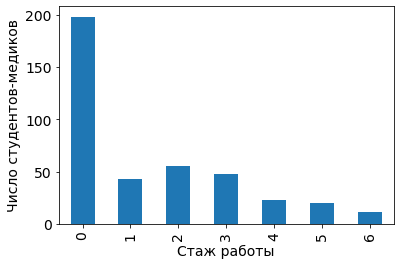

In [68]:
ax = Rm['Стаж'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Стаж работы')
ax.set_ylabel('Число студентов-медиков')
plt.show()

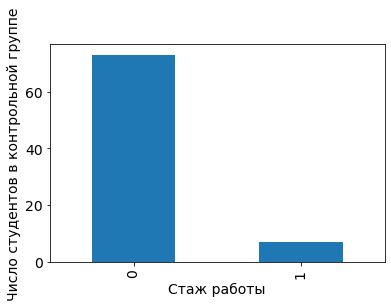

In [70]:
ax = Rc['Стаж'].value_counts().sort_index().plot(kind='bar')
ax.set_xlabel('Стаж работы')
ax.set_ylabel('Число студентов в контрольной группе')
plt.show()

# Причины расстройств, выбранные (и указанные) респондентами

В каждом из восьми блоков вопросов имеется вопрос «Что могло послужить этому причиной?». Респондент мог как выбрать один из предложенных пунктов, так и вписать собственный ответ. Для начала определим, какие причины наиболее часто выбирались в каждом из блоков вопросов.

In [7]:
# Найдём все столбцы с вопросом о причине
reason_cols = [col for col in Rm.columns if "Что могло послужить этому причиной?" in col]

# Проблема в том, что в процессе опроса причины стыкуются через запятую
# но некоторые строки причин сами содержат запятую

# Перечислим заданные в опросе причины-опции, чтобы их найти и посчитать
reasons = ["повышенная учебная нагрузка и переутомление",
           "экзамены",
           "личные причины, не связанные с учебой",
           "совмещение учебы с работой",
           "неопределенность будущей карьеры",
           "разочарованность в будущей профессии",
           "взаимоотношения с одногруппниками",
           "взаимоотношения с преподавателями",
           "разочарованность в выборе учебного заведения",
           "взаимоотношения с коллегами",
           "причины нет"]

def preprocess_col_reasons_str(R, col_num):
    col_name = "Что могло послужить этому причиной?"
    if col_num in range(1, 8):
        col_name = col_name + '.' + str(col_num)
    
    
    col_reasons_str = ", ".join(R[col_name].dropna().values)
    # удалим двойные пробелы
    col_reasons_str = " ".join(col_reasons_str.split())
    
    # одна строка избыточна по отношению к имеющейся, заменим ее более короткой
    old_s = "совмещение учебы с работой (взаимоотношения с коллегами)"
    new_s = "взаимоотношения с коллегами"
    col_reasons_str = col_reasons_str.replace(old_s, new_s)
    return col_reasons_str


def count_reasons(R, col_num):
    """для того, чтобы посчитать количество вхождения строк
    соберем все непустые строки в одну и посчитаем вхождение каждой строки,
    а чтобы остались специфичные ответы, будем удалять посчитанные строки"""
    col_reasons_str = preprocess_col_reasons_str(R, col_num)
    specific_reasons = []   # специфичные причины, описанные респондентами
    reason_cnt = collections.Counter()  # счетчик причин
    
    start_indices = [col_reasons_str.find(reason) for reason in reasons]
    
    while True:
        # найдем индексы вхождения строки каждой причины в общую строку
        start_indices = [col_reasons_str.find(reason) for reason in reasons]
        if start_indices.count(start_indices[0]) == len(start_indices):
            break

        # причина из списка может не упоминаться, тогда find возвращает -1
        # определим номер минимального индекса входящей причины
        current_start_indices = [i for i in start_indices if i >= 0]
        start = min(current_start_indices)
        reason_ind = start_indices.index(start)

        # найдем стартовый и конечный индексы символов для вырезания из строки
        reason = reasons[reason_ind]
        start = start_indices[reason_ind]
        end = start_indices[reason_ind] + len(reasons[reason_ind]) + len(", ")

        # считаем причину
        reason_cnt[reason] += 1

        # удаляем подстроку причины из общей строки
        if start != 0:
            specific_reasons.append(col_reasons_str[:start-len(", ")])
        
        col_reasons_str = col_reasons_str[end:]

    return reason_cnt, specific_reasons

def print_col_reasons(R, col_num):
    """Выводит причины, указанные для одной группы вопросов"""
    print("Причины для группы вопросов «{}»".format(q_categories[col_num]))
    reason_cnt, specific_reasons = count_reasons(R, col_num)
    print("Частота указания причин, выбранных респондентами из списка причин: ")
    for key, value in reason_cnt.most_common():
        print("- {}: {}".format(key, value))
    print("Специфичные причины, указанные респондентами: ")
    for item in specific_reasons:
        print("- «{}»".format(item))
    print("-"*100)

    
def print_all_reasons(R):
    """Выводит все причины, указанные для всех групп вопросов"""
    for col_num in range(8):
        print_col_reasons(R, col_num)


def print_both_all_reason(Rm, Rc):
    """Выводит все причины, указанные для всех групп вопросов и обоих групп студентов"""
    print("Причины в опросе студентов-медиков".upper())
    print_all_reasons(Rm)
    print("="*100)
    print("Причины в опросе контрольной группы".upper())
    print_all_reasons(Rc)

Выведем все причины, указанные студентами в опросах с разбиением вопросов по категориям.

In [8]:
print_both_all_reason(Rm, Rc)

ПРИЧИНЫ В ОПРОСЕ СТУДЕНТОВ-МЕДИКОВ
Причины для группы вопросов «Проблемы со сном»
Частота указания причин, выбранных респондентами из списка причин: 
- повышенная учебная нагрузка и переутомление: 214
- личные причины, не связанные с учебой: 169
- экзамены: 156
- неопределенность будущей карьеры: 104
- разочарованность в будущей профессии: 75
- совмещение учебы с работой: 74
- разочарованность в выборе учебного заведения: 55
- взаимоотношения с одногруппниками: 28
- взаимоотношения с преподавателями: 26
- причины нет: 6
Специфичные причины, указанные респондентами: 
- «Неумение время от времени правильно распределить свое время»
- «Конфликты с начальством, подставы от коллеги.»
- «Личная жизнь»
- «отстуствие понимания, ято я вообще делаю и как это пригодится»
- «в общаге шумно»
- «И это был другой ВУЗ»
- «Некогда спать»
- «Переживания от накопленных отработок, что не успею сдать и вызовут на ректорат опять))»
- «Работа в ночь, особенно, когда на следующее утро на учебу»
- «Психотравмир

Рассмотрим суммарные частоты указания причин для конкретных групп.

In [9]:
def print_total_reasons(R):
    """Выводит частоты указания причин для переданного датасета"""
    total_cnt = collections.Counter()
    for col_num in range(8):
        reason_cnt = count_reasons(R, col_num)[0]
        total_cnt += reason_cnt
    for key, value in total_cnt.most_common():
        print("- {}: {:.2f}".format(key, float(value)/sum(total_cnt.values())))
        
def print_both_total_reasons(Rm, Rc):
    print("Суммарные частоты указания причин студентами-медиками".upper())
    print_total_reasons(Rm)
    print("-"*100)
    print("Суммарные частоты указания причи студентами контрольной группы".upper())
    print_total_reasons(Rc)
    
print_both_total_reasons(Rm, Rc)

СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН СТУДЕНТАМИ-МЕДИКАМИ
- повышенная учебная нагрузка и переутомление: 0.23
- личные причины, не связанные с учебой: 0.21
- экзамены: 0.16
- неопределенность будущей карьеры: 0.09
- совмещение учебы с работой: 0.08
- разочарованность в будущей профессии: 0.06
- взаимоотношения с одногруппниками: 0.05
- разочарованность в выборе учебного заведения: 0.04
- взаимоотношения с преподавателями: 0.04
- причины нет: 0.02
- взаимоотношения с коллегами: 0.00
----------------------------------------------------------------------------------------------------
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИ СТУДЕНТАМИ КОНТРОЛЬНОЙ ГРУППЫ
- личные причины, не связанные с учебой: 0.24
- повышенная учебная нагрузка и переутомление: 0.23
- экзамены: 0.17
- неопределенность будущей карьеры: 0.10
- разочарованность в будущей профессии: 0.05
- взаимоотношения с одногруппниками: 0.05
- разочарованность в выборе учебного заведения: 0.05
- взаимоотношения с преподавателями: 0.04
- совмещение уч

Рейтинг причин психического дискомфорта студентов: 1) повышенная учебная нагрузка и переутомление; 2) личные причины, не связанные с учебой;  3) экзамены; 4) неопределенность будущей карьеры.
Совмещение учебы с работой только на 5 месте и процент невысок, но в 2 раза больше по сравнению с контрольной группой. 

# Влияние номера курса
Очевидно, что студенты первых курсов испытывают большие трудности с обучением, чем с работой, а для старших курсов стоит выяснить этот вопрос отдельно. Покажем, что студенты старших курсов чаще работают, чем студенты младших. 

In [10]:
# определим доли работающих студентов
Km_old_work = len(Rm_old_work)/len(Rm_old)*100
Km_yng_work = len(Rm_yng_work)/len(Rm_yng)*100
Kc_old_work = len(Rc_old_work)/len(Rc_old)*100
Kc_yng_work = len(Rc_yng_work)/len(Rc_yng)*100

print('Процент работающих старшекурсников-медиков: {0:.1f}.'.format(Km_old_work))
print('Процент студентов-медиков, работающих на младших курсах: {0:.1f}.'.format(Km_yng_work))
print('Процент работающих студентов старших курсов из контрольной группы (выборка мала): {0:.1f}.'.format(Kc_old_work))
print('Процент работающих студентов младших курсов из контрольной группы (выборка мала): {0:.1f}.'.format(Kc_yng_work))

Процент работающих старшекурсников-медиков: 56.5.
Процент студентов-медиков, работающих на младших курсах: 12.0.
Процент работающих студентов старших курсов из контрольной группы (выборка мала): 24.0.
Процент работающих студентов младших курсов из контрольной группы (выборка мала): 5.5.


Создадим инструмент для создания гистограмм процентных качеств с отображением для разных курсов:

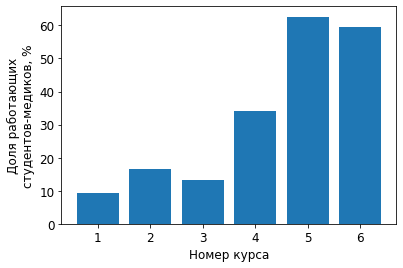

In [71]:
matplotlib.rcParams.update({'font.size': 12})

def hist_course_condition(R, column, condition, true_flag=True):
    """Строит распределение долей студентов, соответствующих условию condition на каждом из шести курсов,
    флаг true_flag=False выбирает только тех студентов, которые не соответствуют условию"""
    condition_percent = []
    for i in range(1, 7):
        R_course = R[R['Курс'] == i]
        if true_flag:
            R_course_condition = R_course[R_course[column] == condition]
        else:
            R_course_condition = R_course[R_course[column] != condition]
        condition_percent.append(len(R_course_condition)/len(R_course)*100)
    return condition_percent


def hist_experience_condition(R, column, condition, true_flag=True):
    """Строит распределение долей студентов, соответствующих условию condition на каждом из шести курсов,
    флаг true_flag=False выбирает только тех студентов, которые не соответствуют условию"""
    condition_percent = []
    for i in range(0, 6):
        R_exp = R[R['Стаж'] == i]
        if true_flag:
            R_exp_condition = R_exp[R_exp[column] == condition]
        else:
            R_exp_condition = R_exp[R_exp[column] != condition]
        condition_percent.append(len(R_exp_condition)/len(R_exp)*100)
    return condition_percent


def work_hist_plot(R, y_label="Доля работающих студентов"):
    m = hist_course_condition(R, column = s_work, condition = c_work)
    plt.bar(range(1,7), m)
    plt.xlabel("Номер курса")
    plt.ylabel(y_label)
    plt.show()
    
work_hist_plot(Rm, "Доля работающих\nстудентов-медиков, %")

Отдельный инструмент для построения двойных диаграм.

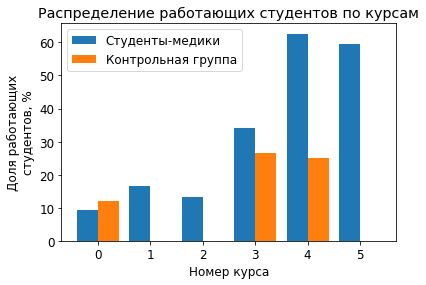

In [12]:
def double_hist_course_plot(Rm, Rc, column, condition, y_label, title):
    """Построение диаграмм для курсов с парами столбцов"""
    x = np.arange(6)
    width = 0.4
    
    m = hist_course_condition(Rm, column, condition)
    c = hist_course_condition(Rc, column, condition)

    fig, ax = plt.subplots()
    ax.bar(x - width/2, m, width, label='Студенты-медики')
    ax.bar(x + width/2, c, width, label='Контрольная группа')
    ax.set_xlabel('Номер курса')
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.legend()
    plt.show()

double_hist_course_plot(Rm, Rc, s_work, c_work,
                        'Доля работающих\nстудентов, %',
                        'Распределение работающих студентов по курсам')

Сравним между собой причины, указанные студентами младших и старших курсов

In [13]:
print('Студенты первых трёх курсов:')
print_both_total_reasons(Rm_yng, Rc_yng)

Студенты первых трёх курсов:
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН СТУДЕНТАМИ-МЕДИКАМИ
- повышенная учебная нагрузка и переутомление: 0.28
- личные причины, не связанные с учебой: 0.23
- экзамены: 0.18
- неопределенность будущей карьеры: 0.07
- взаимоотношения с одногруппниками: 0.06
- взаимоотношения с преподавателями: 0.05
- разочарованность в будущей профессии: 0.05
- разочарованность в выборе учебного заведения: 0.05
- причины нет: 0.02
- совмещение учебы с работой: 0.02
- взаимоотношения с коллегами: 0.00
----------------------------------------------------------------------------------------------------
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИ СТУДЕНТАМИ КОНТРОЛЬНОЙ ГРУППЫ
- личные причины, не связанные с учебой: 0.23
- повышенная учебная нагрузка и переутомление: 0.22
- экзамены: 0.18
- неопределенность будущей карьеры: 0.09
- разочарованность в будущей профессии: 0.06
- разочарованность в выборе учебного заведения: 0.06
- взаимоотношения с преподавателями: 0.05
- взаимоотношения с одногруп

In [14]:
print('Студенты последних трех курсов:')
print_both_total_reasons(Rm_old, Rc_old)

Студенты последних трех курсов:
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН СТУДЕНТАМИ-МЕДИКАМИ
- повышенная учебная нагрузка и переутомление: 0.21
- личные причины, не связанные с учебой: 0.20
- экзамены: 0.15
- совмещение учебы с работой: 0.11
- неопределенность будущей карьеры: 0.10
- разочарованность в будущей профессии: 0.07
- разочарованность в выборе учебного заведения: 0.04
- взаимоотношения с преподавателями: 0.04
- взаимоотношения с одногруппниками: 0.04
- причины нет: 0.02
- взаимоотношения с коллегами: 0.00
----------------------------------------------------------------------------------------------------
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИ СТУДЕНТАМИ КОНТРОЛЬНОЙ ГРУППЫ
- личные причины, не связанные с учебой: 0.26
- повышенная учебная нагрузка и переутомление: 0.25
- экзамены: 0.15
- неопределенность будущей карьеры: 0.10
- совмещение учебы с работой: 0.06
- взаимоотношения с одногруппниками: 0.05
- разочарованность в будущей профессии: 0.04
- взаимоотношения с преподавателями: 0.02
-

Таким образом, совмещение учебы с работой указывают примерно в 2 раза чаще студенты-медики как последних трех курсов обучения, так и те, у кого по результатам опроса предполагаются невротические состояния. Но процент невысок.

# Поиск матричных элементов 

Не все пункты опроса из таблиц `R` присутствуют в таблице шкал `С`. Создадим специальные датасеты для матричных операций:

In [15]:
qs_yn = C['Вопрос']   # список вопросов таблицы C
Rm_yn = Rm[qs_yn]     # таблица ответов студентов-медиков, содержащая те же вопросы, что таблица C
Rc_yn = Rc[qs_yn]     # таблица ответов контрольной-группы, содержащая те же вопросы, что таблица C

Приведем таблицы к виду числовых матриц. Таблицы опроса будут обозначаться $R$ для студентов-медиков и $R'$ для контрольной группы. Ответу $i$-го респондента на $j$-й вопрос соответствует элемент $R_{ij}$. Таблица шкал образует матрицу $C$, в которой $j$-му вопросу в $k$-ой шкале соответствует оценка $C_{jk}$. Количество ненулевых оценок $k$-й шкалы обозначим $m_k$.

Для того, чтобы привести таблицы к виду числовых матриц, произведем замену строковых значений на числа:
- $1$ – «да»,
- $0.5$ – ответы, начинающиеся с «в данный период времени нет, но раньше...»,
- $-1$ – «нет».

Предварительные оценки в матрице $С$ даны в виде рангов:
- $1$ — вопрос играет существенную роль для данного типа невротического расстройства,
- $0.5$ — вопрос имеет значение для данного типа невротического расстройства, но меньшее,
- $0$ — не имеется сведений, чтобы вопрос имел значение для данного типа расстройства.

Для того, чтобы охарактеризовать $i$-го респондента по шкале $k$, сопоставим некоторый численный показатель $X_{ik}$, который можно вычислить через перемножение матриц $R$ и $C$:

$$X_{ik} = \frac{1}{m_k} \sum_{j=1}^n{R_{ij}C_{jk}}$$

Нормирующий коэффициент $m_k$ учитывает, что число оценок в шкалах различно.

In [16]:
# Определим количество ненулевых значений в каждой из шкал
# учтем, что два первых столбца - вопрос и категория вопроса
m_k = np.count_nonzero(C, axis=0)[2:]  

# Сопоставим числа значениям таблиц опроса
R_mapping = {'да': 1, 'нет': -1, '':0, None:0,
           'в данный период времени нет, но раньше наблюдалось подобное':0.5,
           'в данный период времени нет, но раньше был таким':0.5,
           'в данный период времени нет, но раньше сталкивался с подобным':0.5,
           'в данный период времени нет, но раньше бывали':0.5}

Rm_num = Rm_yn.replace(R_mapping)
Rc_num = Rc_yn.replace(R_mapping)

# Таблица С уже почти соответствует матрице, за исключением первых двух столбцов
C_mapping = {-1:-1.0, 0:0.0, 1:1.0, 2:2.0}  # переобозначение чисел таблицы С
C_num = C[C.columns[2:]].replace(C_mapping)

# Перемножим матрицы
Xm = Rm_num.dot(C_num.values)/m_k   # студенты-медики
Xc = Rc_num.dot(C_num.values)/m_k   # контрольная группа

# Распределения параметра $X$ для разных шкал

Построим распределения параметра для разных шкал.

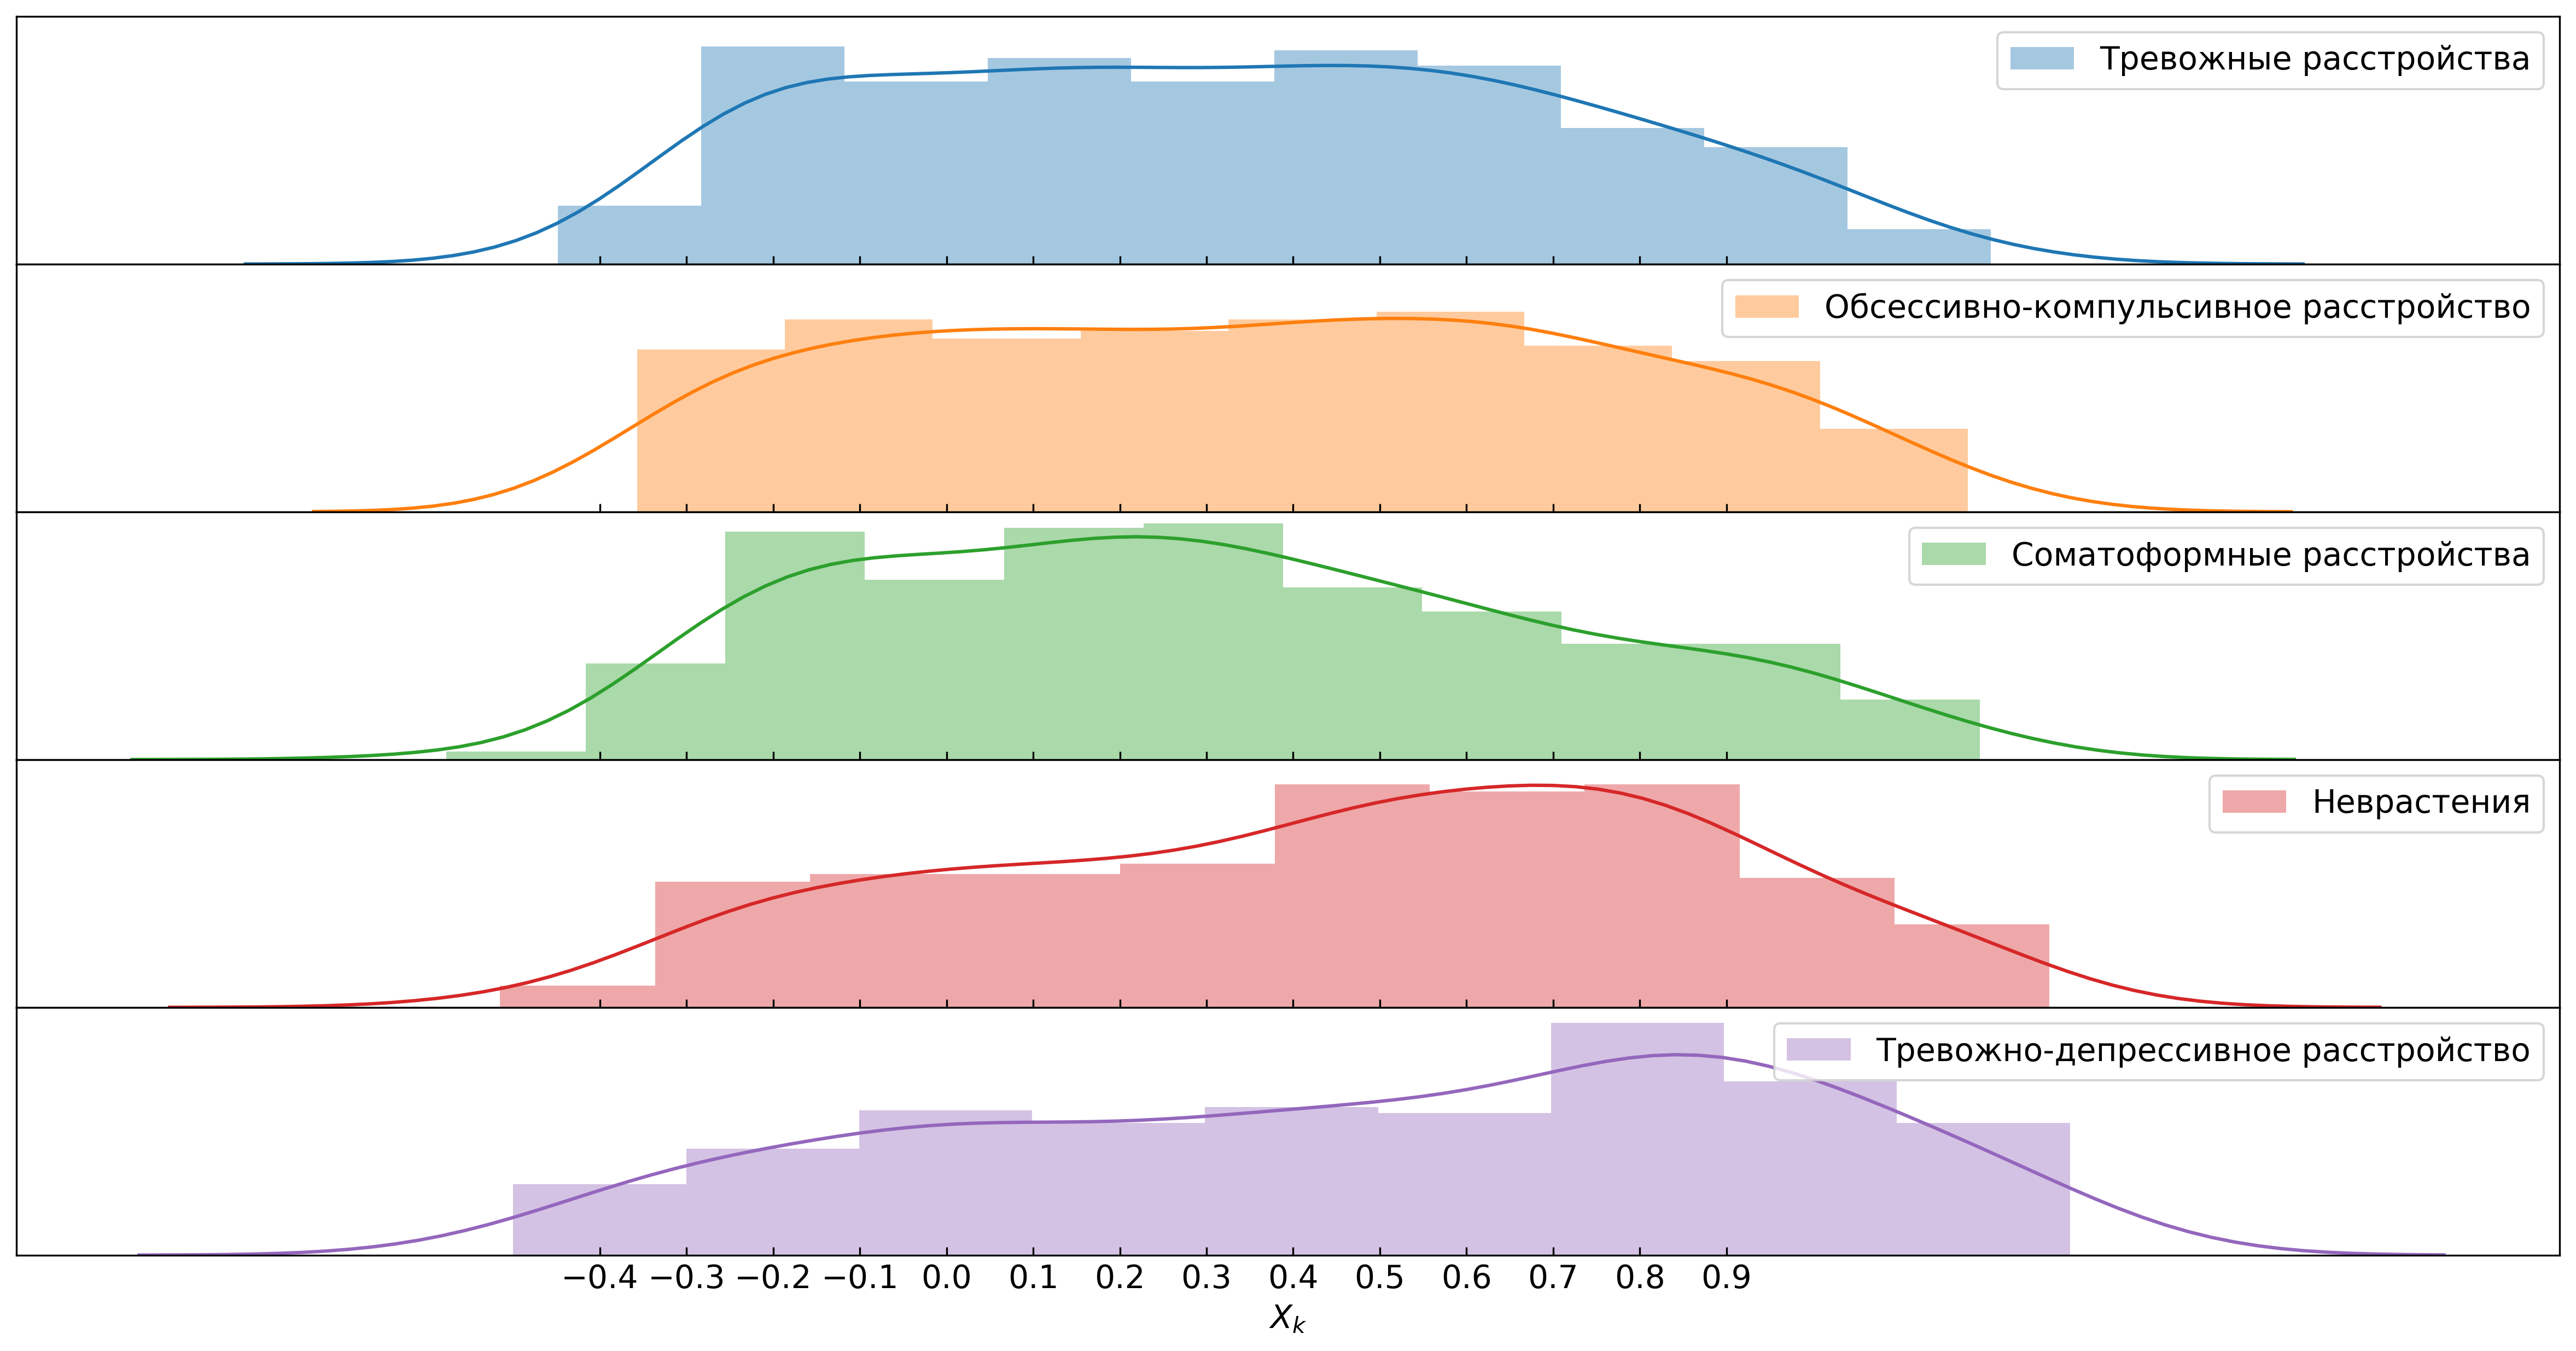

In [17]:
matplotlib.rcParams.update({'font.size': 14})

def plot_X(X):
    fig, axs = plt.subplots(C_num.shape[1], sharex=True, sharey = True, figsize=(20, 10), dpi=300, gridspec_kw={'hspace': 0})
    palette = sns.color_palette()

    for i in range(len(C_num.columns)):
        #axs[i].grid(True)
        sns.distplot(X.values[:, i], ax=axs[i], label = C_num.columns[i], color=palette[i])
        axs[i].legend(loc='upper right')
        axs[i].set_yticks([])
        axs[i].tick_params(direction='in')
        axs[i].set_xticks(np.arange(start=-0.4, step=0.1, stop=1.0))


    axs[i].xaxis.set_ticks_position('bottom')
    plt.setp(axs[i].get_xticklabels(), visible=True)
    axs[i].set_xlabel('$X_k$')
    
plot_X(Xm)

Сравним распределения с контрольной группой студентов:

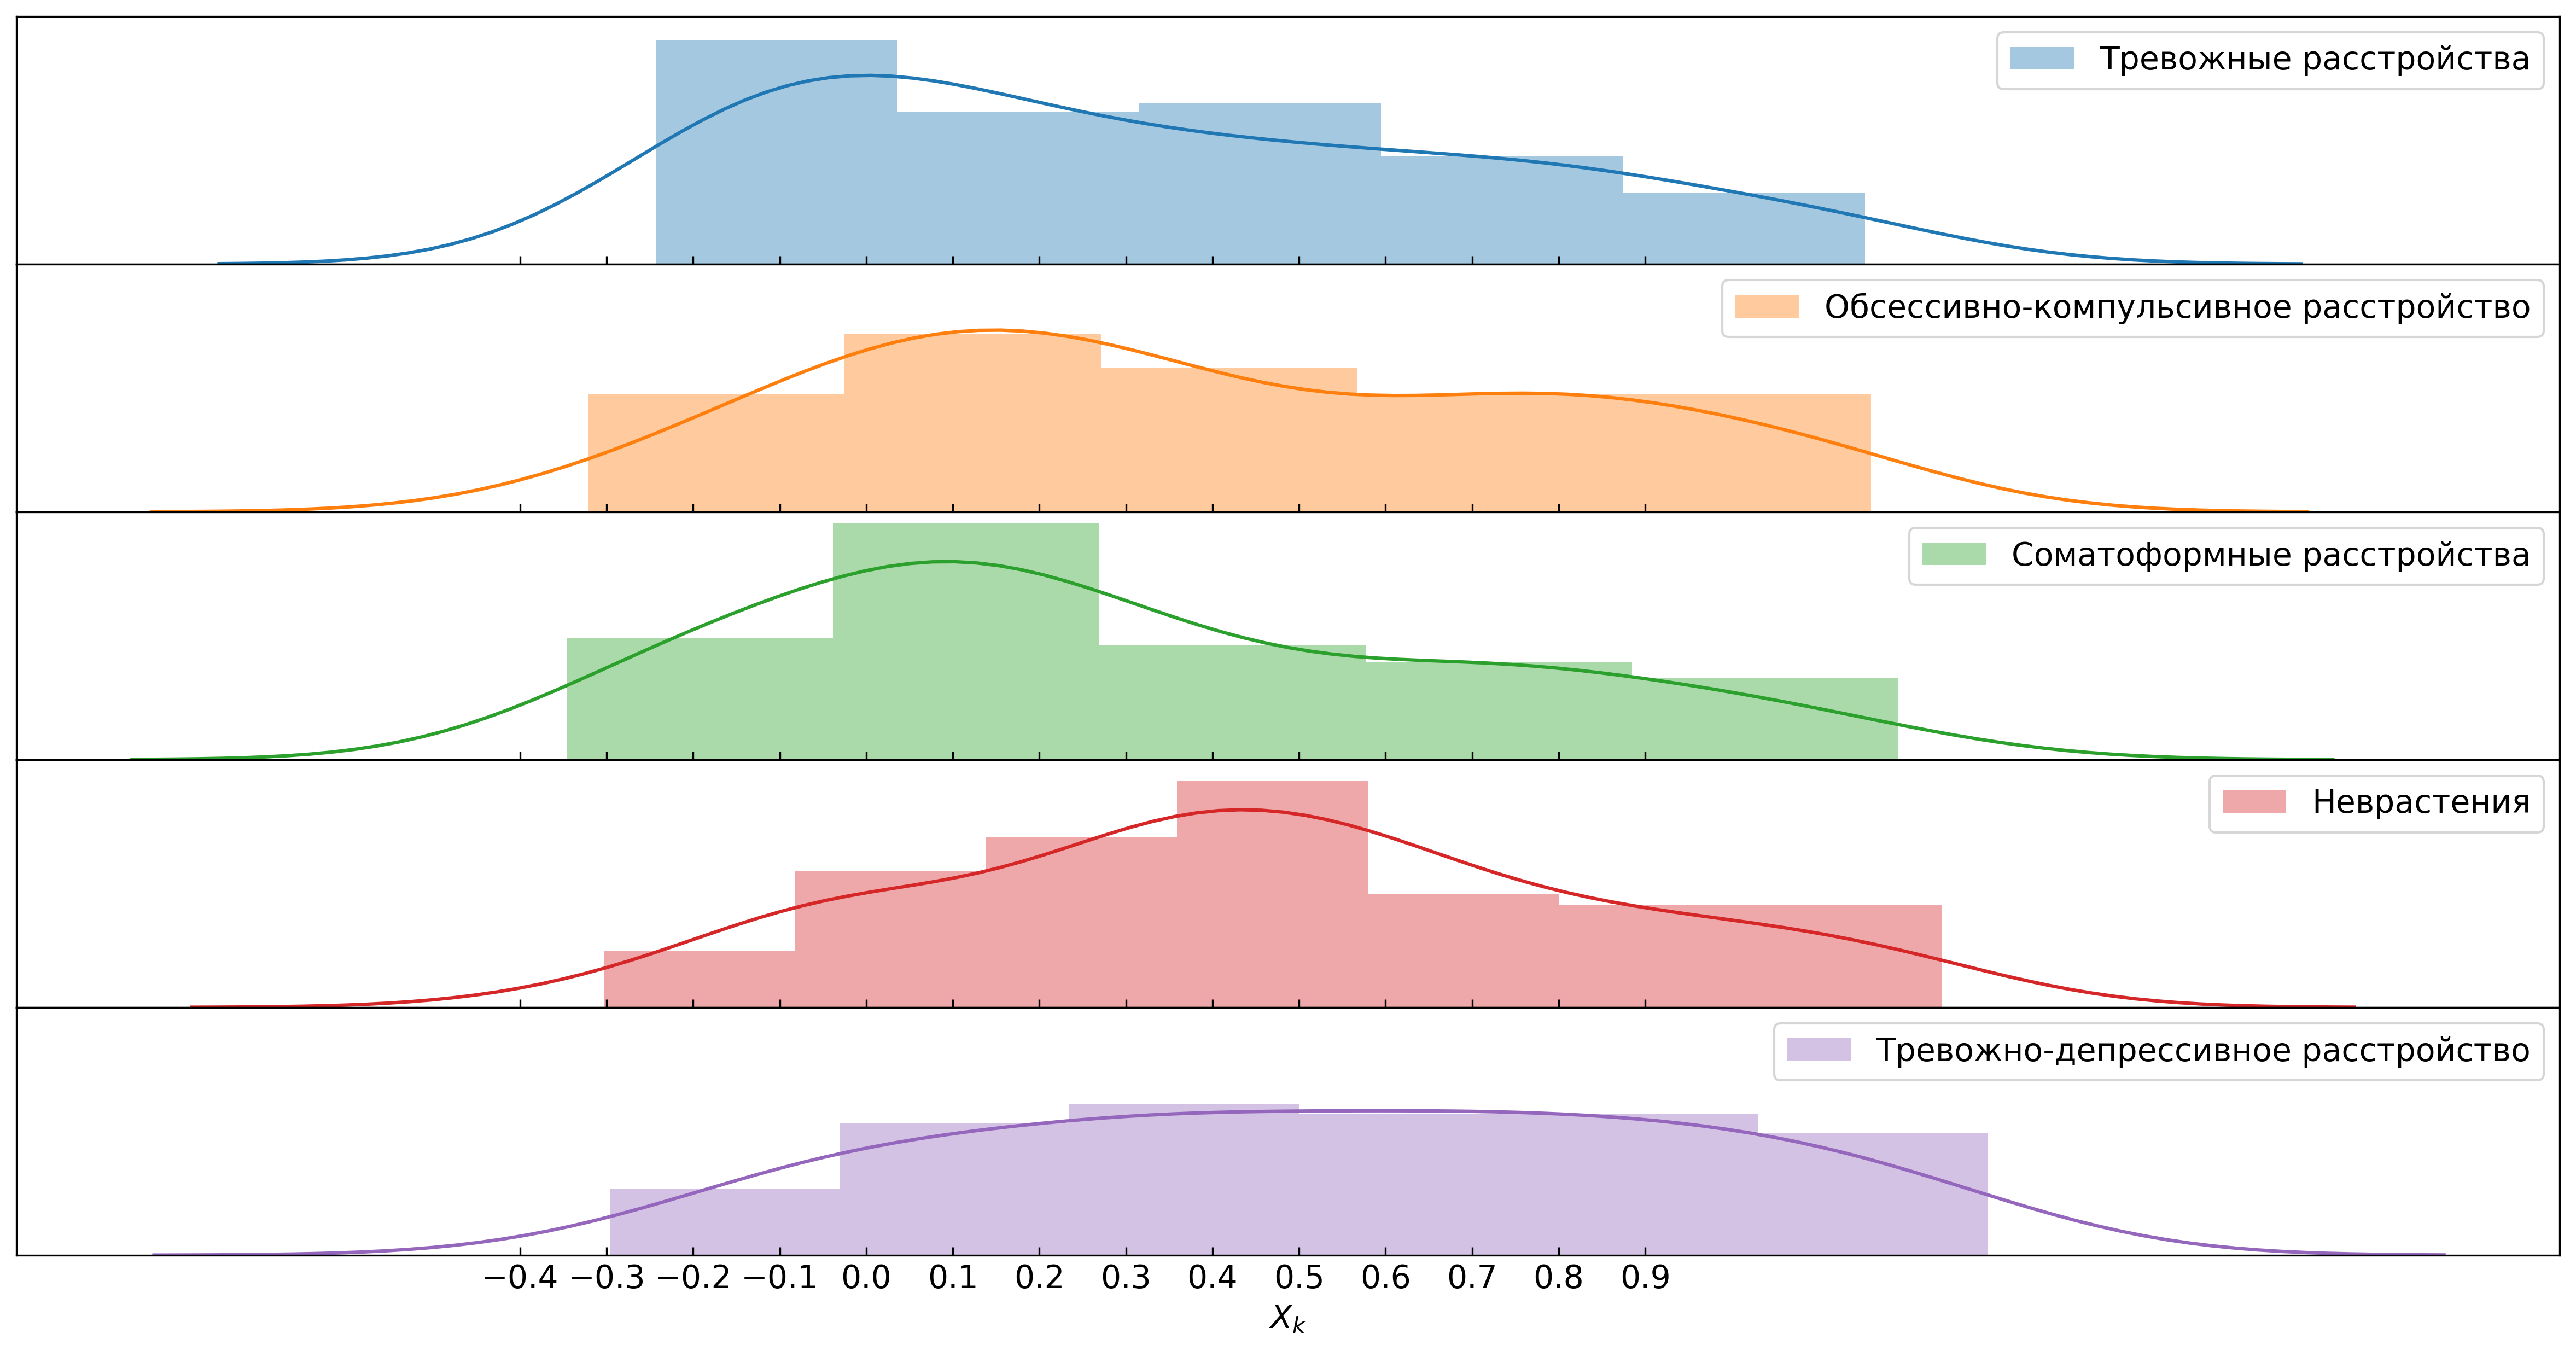

In [18]:
plot_X(Xc)

Можно видеть, что в сравнении с контрольной группы, максимумы распределений X сдвинуты в сторону больших значений.

# Категориальная оценка респондентов по критическим вопросам

Возьмем в каждой шкале $C_k$ *критические* вопросы, для которых $С_{j} = 2$. Подсчитываем по $k$-й шкале для критических вопросов минимальное значение $X_k^{кр}$, как если бы респондент положительно отвечал лишь на эти вопросы:

$$X_k^{кр} = \frac{1}{m_k} \sum_{R_{j}=1, С_{j} = 2}{R_{j}C_{j}}.$$

Если для шкалы $k$ выполняется условие $X_{ik} > X_k^{кр}$ и респондент ответил положительно на все критические вопросы, считаем, что есть подозрение на данный тип невроза. Если баллы получаются по нескольким шкалам, то у респондента неопределенное невротическое расстройство.

In [19]:
# Для того, чтобы реализовать нахождение критических значений
# достаточно обнулить все значения в C_num, кроме максимальных

# Определим замену для C_num
C_mapping = {item:0 for item in np.unique(C_num) if item !=max(np.unique(C_num))}
C_cr = C_num.replace(C_mapping) # обнуляем все значения кроме максимального

# Создадим столбец R длиной с ширину матрицы С
R_cr = np.empty((1, C_cr.shape[0]))   
R_cr.fill(1)   # заполним все ячейки единицами

X_cr = R_cr.dot(C_cr.values)/m_k
X_cr

array([[0.41025641, 0.35714286, 0.38461538, 0.54545455, 0.59259259]])

In [20]:
# Рассчитаем матрицу аналогично Xik, но для критических вопросов
Xm_cr = Rm_num.dot(C_cr.values)/m_k   # оценка студентов-медиков по критическим вопросам
Xc_cr = Rc_num.dot(C_cr.values)/m_k   # оценка контрольной группы по критическим вопросам

# Выбираем людей, у которых порог выше найденного для шкалы
# и ответивших на вопросы, соответствующие данной шкале
Xm_bool = (Xm >= X_cr) & (Xm_cr == X_cr)
Xc_bool = (Xc >= X_cr) & (Xc_cr == X_cr)

def row_conclusion(row):
    if row.sum() == 0:
        s = 'Здоровый'
    elif row.sum() > 1:
        s = 'Неопределенное невротическое расстройство'
    elif row.sum() == 1:
        ind = row[row==True].index.to_list()[0]
        s = C_num.columns[ind]
    return s

# Применим функцию row_conclusion ко всем столбцам логических матриц
Rm['Психическое здоровье'] = Xm_bool.apply(row_conclusion, axis = 1)
Rc['Психическое здоровье'] = Xc_bool.apply(row_conclusion, axis = 1)

In [21]:
Cond_m = Rm['Психическое здоровье'].value_counts()/sum(Rm['Психическое здоровье'].value_counts())
Cond_c = Rc['Психическое здоровье'].value_counts()/sum(Rc['Психическое здоровье'].value_counts())

In [22]:
Cond_m

Здоровый                                     0.703518
Неопределенное невротическое расстройство    0.155779
Тревожно-депрессивное расстройство           0.052764
Обсессивно-компульсивное расстройство        0.027638
Неврастения                                  0.025126
Соматоформные расстройства                   0.025126
Тревожные расстройства                       0.010050
Name: Психическое здоровье, dtype: float64

In [23]:
Cond_c

Здоровый                                     0.7125
Неопределенное невротическое расстройство    0.1375
Обсессивно-компульсивное расстройство        0.0500
Тревожно-депрессивное расстройство           0.0375
Соматоформные расстройства                   0.0375
Тревожные расстройства                       0.0250
Name: Психическое здоровье, dtype: float64

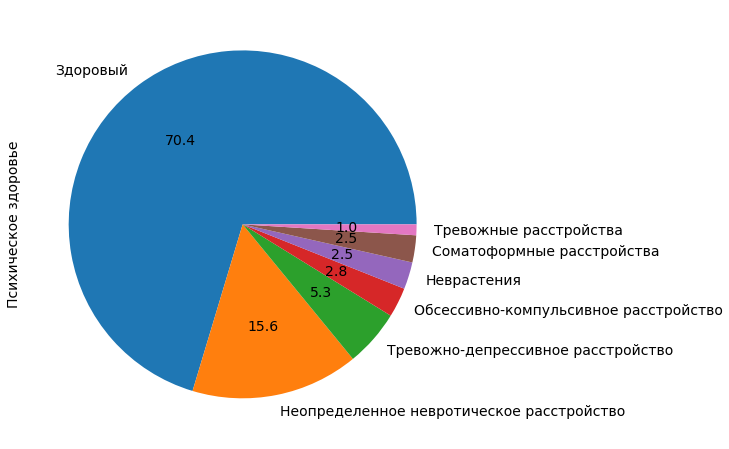

In [24]:
Cond_m.plot(kind='pie', figsize=(8, 8), autopct='%.1f')
plt.show()

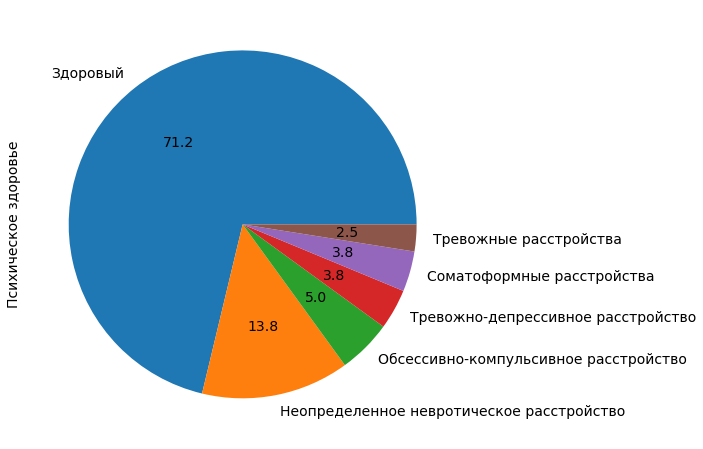

In [25]:
Cond_c.plot(kind='pie', figsize=(8, 8), autopct='%.1f')
plt.show()

In [26]:
# выведем полученные результаты в файлы таблиц

Rm.to_csv('Rm_with_conclusion.csv', sep = ';', encoding='utf-8')
Rc.to_csv('Rc_with_conclusion.csv', sep = ';', encoding='utf-8')

Создадим отдельные подгруппы наборов данных для студентов у которых предполагается невроз и нет.

In [27]:
s_psy, c_psy = 'Психическое здоровье', 'Здоровый'
s_work = 'Совмещаете ли Вы учебу с работой?'
c_work = 'да, в данный момент трудоустроен'

def he(R):
    """Сокращение от helth and employment,
    возвращает словарь разделения на подгруппы по категориям работы и здоровья,
    а также совмещённым категориям"""
        
    R_yh = R[R[s_psy]  == c_psy ]  # здоровые yes, healthy
    R_nh = R[R[s_psy]  != c_psy ]  # больные not helthy
    R_yw = R[R[s_work] == c_work]  # работают yes, working
    R_nw = R[R[s_work] != c_work]  # не работают not work
    R_yhyw = R_yh[R_yh[s_work] == c_work]
    R_nhyw = R_nh[R_nh[s_work] == c_work]
    R_yhnw = R_yh[R_yh[s_work] != c_work]
    R_nhnw = R_nh[R_nh[s_work] != c_work]
    
    return {'Здоровы':R_yh,
            'Больны':R_nh,
            'Работают':R_yw,
            'Не работают':R_nw,
            'Здоровы и работают':R_yhyw,
            'Больны и работают':R_nhyw,
            'Здоровы и не работают':R_yhnw,
            'Больны и не работают':R_nhnw}

Оценим как изменится картина причин у людей, не попавших в группу здоровых.

In [28]:
print_both_total_reasons(he(Rm)['Больны'], he(Rc)['Больны'])

СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИН СТУДЕНТАМИ-МЕДИКАМИ
- повышенная учебная нагрузка и переутомление: 0.23
- личные причины, не связанные с учебой: 0.21
- экзамены: 0.16
- неопределенность будущей карьеры: 0.10
- совмещение учебы с работой: 0.07
- разочарованность в будущей профессии: 0.07
- взаимоотношения с одногруппниками: 0.05
- разочарованность в выборе учебного заведения: 0.05
- взаимоотношения с преподавателями: 0.04
- причины нет: 0.02
- взаимоотношения с коллегами: 0.00
----------------------------------------------------------------------------------------------------
СУММАРНЫЕ ЧАСТОТЫ УКАЗАНИЯ ПРИЧИ СТУДЕНТАМИ КОНТРОЛЬНОЙ ГРУППЫ
- личные причины, не связанные с учебой: 0.24
- повышенная учебная нагрузка и переутомление: 0.22
- экзамены: 0.16
- неопределенность будущей карьеры: 0.11
- взаимоотношения с преподавателями: 0.06
- разочарованность в будущей профессии: 0.06
- разочарованность в выборе учебного заведения: 0.05
- взаимоотношения с одногруппниками: 0.05
- совмещение уч

Рассмотрим как меняются соотношения в зависимости от курса.

In [29]:
def condition(R, course_num):
    R = R[R['Курс'] == course_num]
    Cond_m = R[s_psy].value_counts()/sum(R[s_psy].value_counts())
    return Cond_m

for i in range(1, 7):
    print('Психическое состояние студентов-медиков для курса: {}'.format(i))
    print(condition(Rm, i))
    
for i in range(1, 7):
    print('Психическое состояние контрольной группы для курса: {}'.format(i))
    print(condition(Rc, i))

Психическое состояние студентов-медиков для курса: 1
Здоровый                                     0.733333
Неопределенное невротическое расстройство    0.146667
Соматоформные расстройства                   0.040000
Тревожно-депрессивное расстройство           0.026667
Неврастения                                  0.026667
Тревожные расстройства                       0.013333
Обсессивно-компульсивное расстройство        0.013333
Name: Психическое здоровье, dtype: float64
Психическое состояние студентов-медиков для курса: 2
Здоровый                                     0.733333
Неопределенное невротическое расстройство    0.133333
Неврастения                                  0.066667
Тревожно-депрессивное расстройство           0.033333
Соматоформные расстройства                   0.033333
Name: Психическое здоровье, dtype: float64
Психическое состояние студентов-медиков для курса: 3
Здоровый                                     0.733333
Неопределенное невротическое расстройство    0.133333

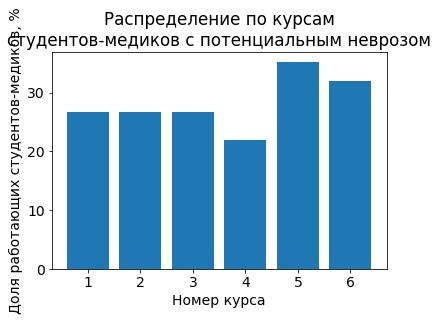

In [30]:
#! Заменить на обновлённый инструмент

plt.title("Распределение по курсам\nстудентов-медиков с потенциальным неврозом")
m = hist_course_condition(Rm, 'Психическое здоровье', 'Здоровый', true_flag =False)
plt.bar(range(1,7), m)
plt.xlabel('Номер курса')
plt.ylabel('Доля работающих студентов-медиков, %')
plt.show()

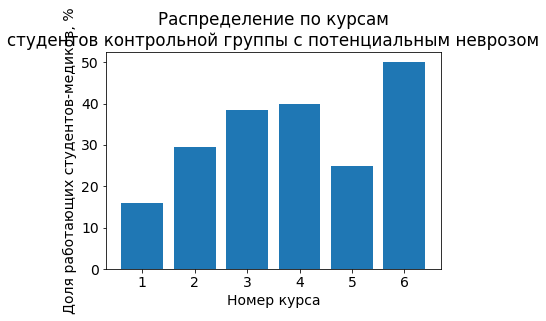

In [31]:
#! Заменить на обновлённый инструмент

plt.title("Распределение по курсам\nстудентов контрольной группы с потенциальным неврозом")
m = hist_course_condition(Rc, 'Психическое здоровье', 'Здоровый', true_flag =False)
plt.bar(range(1,7), m)
plt.xlabel('Номер курса')
plt.ylabel('Доля работающих студентов-медиков, %')
plt.show()

- У 29,65% студентов-медиков можно предположить наличие каких-либо невротических состояний, что ненамного больше результатов в контрольной группе - 28,75%. Но структура каждой группы различна. Последовательное уменьшение числа студентов без подозрения на невротическое расстройство с 1 по 4 курс в контрольной группе (5 и 6 курс не учитываем, т.к. выборка мала).
- Обращают внимание равные доли студентов-медиков первых трех курсов, попавших в группу условно здоровых - 26,67%. Ожидался повышенный процент первокурсников как проявление адаптации.  Предположительное объяснение этому: опрос проводился в ноябре-декабре, еще до первой зимней сессии.
- На 4 курсе самый низкий процент студентов-медиков, попавших в группу риска среди студентов-медиков - 21,95%. Это можно объяснить тем, что после третьего курса меняется учебный график и снижается учебная нагрузка. Доля работающих наименьшая в сравнении с 5 и 6 курсами.  Вызывает интерес тот факт, что шкала ОКР на первом месте среди невротических состояний среди обеих групп студентов.
- На 5 и 6 курсах - пик невротических состояний: 35,16% и 31,9% соответственно.


# Корреляция болезни и факта работы респондентов

Найдем ответы на следующие вопросы:
1) Какова доля работающих среди "больных"?
2) Как меняются эти доли для старших курсов?

In [32]:
def ill_and_work_percent(R):
    """Возвращает процент работающих среди больных"""
    R_ill = he(R)['Больны']
    R_ill_num = len(R_ill)
    R_ill_work = he(R)['Больны и работают']
    R_ill_work_num = len(R_ill_work)
    return R_ill_work_num/R_ill_num*100

print('Общий процент:')
print('Доля работающих среди "больных" студентов-медиков: {0:.1f} %.'.format(ill_and_work_percent(Rm)))
print('Доля работающих среди "больных" в контрольной группе: {0:.1f} %.'.format(ill_and_work_percent(Rc)))

# переопределим студентов первых трех и последних трех курсов с учётом добавления нового столбца
Rm_yng = Rm[Rm['Курс'] <= 3]
Rm_old = Rm[Rm['Курс'] >  3]
Rc_yng = Rc[Rc['Курс'] <= 3]
Rc_old = Rc[Rc['Курс'] >  3]

print('Для старших курсов:')
print('Доля работающих среди "больных" студентов-медиков: {0:.1f} %.'.format(ill_and_work_percent(Rm_old)))
print('Доля работающих среди "больных" в контрольной группе: {0:.1f} %.'.format(ill_and_work_percent(Rc_old)))

print('Для младших курсов:')
print('Доля работающих среди "больных" студентов-медиков: {0:.1f} %.'.format(ill_and_work_percent(Rm_yng)))
print('Доля работающих среди "больных" в контрольной группе: {0:.1f} %.'.format(ill_and_work_percent(Rc_yng)))

Общий процент:
Доля работающих среди "больных" студентов-медиков: 33.9 %.
Доля работающих среди "больных" в контрольной группе: 13.0 %.
Для старших курсов:
Доля работающих среди "больных" студентов-медиков: 46.2 %.
Доля работающих среди "больных" в контрольной группе: 22.2 %.
Для младших курсов:
Доля работающих среди "больных" студентов-медиков: 10.0 %.
Доля работающих среди "больных" в контрольной группе: 7.1 %.


Доля работающих студентов-медиков в 2 раза выше, чем в контрольной группе. Студенты-медики преимущественно работают на старших курсах: 57% против 12% студентов младших курсов. Максимальные значения на 5 и 6 курсах студентов-медиков, что совпадает с результатами категориальной оценки по диагностическим шкалам.


Составим функции для нахождения остальных коэффициентов в формуле расчета отношения рисков

In [33]:
def abcd(R):
    h = he(R)
    a = len(h['Больны и работают'])
    b = len(h['Здоровы и работают'])
    c = len(h['Больны и не работают'])
    d = len(h['Здоровы и не работают'])
    return a, b, c, d

def risk_relation(R):
    a, b, c, d = abcd(R)
    risk_e_plus = a/(a+b)  # доля больных среди работающих
    risk_e_minus = c/(c+d)
    risk_relation = risk_e_plus/risk_e_minus
    return risk_relation, risk_e_plus, risk_e_minus

In [34]:
risk_relation(Rm_old)

(0.6612244897959183, 0.2571428571428571, 0.3888888888888889)

In [35]:
risk_relation(Rc_old)

(0.9047619047619048, 0.3333333333333333, 0.3684210526315789)

In [36]:
t = abcd(Rc)
s = sum(t)
seq = [item/s*100 for item in t]
seq

[3.75, 7.5, 25.0, 63.74999999999999]

Отношение рисков (ОР), также называемое относительным риском, – это оценка вероятности развития заболевания у людей, подверженных воздействию, по сравнению с не подверженными воздействию. Это отношение доли подверженных воздействию больных к доле не подверженных воздействию больных. 

a/(a+b) -  частота встречаемости студентов с риском развития невротических расстройств среди тех, кто трудоустроен.

c/(c+d) - частота встречаемости студентов с риском развития невротических расстройств среди тех, кто не работает.

Относительный риск меньше единицы, следовательно воздействие благотворно или ассоциировано с уменьшением риска заболевания. 
Возникает вопрос: устойчивее ли работающие студенты относительно риска развития невротических состояний?

# Потребность обращения к психиатру

In [37]:
s = "Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?"

print(1-Rm[s].isna().sum()/len(Rm[s]))
Rm[s].value_counts()/len(Rm[s])

0.5


да, возникала, но НЕ обращался    0.246231
нет                               0.125628
да, возникала, обращался          0.118090
обращался еще до обучения         0.010050
Name: Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?, dtype: float64

In [38]:
print(1-Rc[s].isna().sum()/len(Rc[s]))
Rc[s].value_counts()/len(Rc[s])

0.65


да, возникала, но НЕ обращался    0.2875
нет                               0.1875
да, возникала, обращался          0.1500
обращался еще до обучения         0.0250
Name: Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?, dtype: float64

Рассмотрим те же показатели только среди респондентов, у которых мы предполагаем наличие невроза:

In [39]:
ill_flag = Rm['Психическое здоровье']!='Здоровый'
Rm[ill_flag][s].value_counts()/len(Rm[ill_flag][s])

да, возникала, но НЕ обращался    0.423729
да, возникала, обращался          0.194915
нет                               0.059322
обращался еще до обучения         0.016949
Name: Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?, dtype: float64

In [40]:
ill_flag = Rc['Психическое здоровье']!='Здоровый'
Rc[ill_flag][s].value_counts()/len(Rc[ill_flag][s])

да, возникала, но НЕ обращался    0.608696
да, возникала, обращался          0.217391
обращался еще до обучения         0.043478
нет                               0.043478
Name: Возникала ли у Вас за время учебы потребность обратиться за помощью к психиатру, психотерапевту?, dtype: float64

Видим, что у большинства из ответивших респондентов и в группе студентов-медиков, и в контрольной группе при понимании возникновения проблем не обращались к психиатру. Также это указывает на то, что студенты сами ощущают психический дискомфорт и опрос позволяет выявить такие случаи.

# Оценка корреляции между вопросами

Чтобы охарактеризовать зависимость между различными пунктами опроса оценим корреляцию вопросов посредством [линейного коэффициента корреляции Пирсона](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8_%D0%9F%D0%B8%D1%80%D1%81%D0%BE%D0%BD%D0%B0) $r$:

$$r_{xy} = \dfrac{\sum^m_{i=1}{(x_i-\overline{x})(y_i-\overline{y})}}{\sqrt{\sum^m_{i=1}{(x_i-\overline{x})^2}\sum^m_{i=1}{(y_i-\overline{y})^2}}},$$

где $\overline{x}, \overline{y}$ – выборочные средние для результатов опроса по вопросам $x$ и $y$ (строки матрицы $С$). Коэффициент корреляции Пирсона служит критерием «тесноты» линейно связи:
- $|r_{xy}| = 1 \Rightarrow x, y$ линейно зависимы,
- $r_{xy} = 0 \Rightarrow x, y$ линейно независимы

Изобразим распределение значений коэффициента в виде цветовой карты. Так как для диагональных элементов матрицы $r_{xy}$ имеет одинаковое максимальное значение (при $x=y$ значение $r = 1$), чтобы не терять контраст изображения и шкалы, обнулим значения отображаемой матрицы.

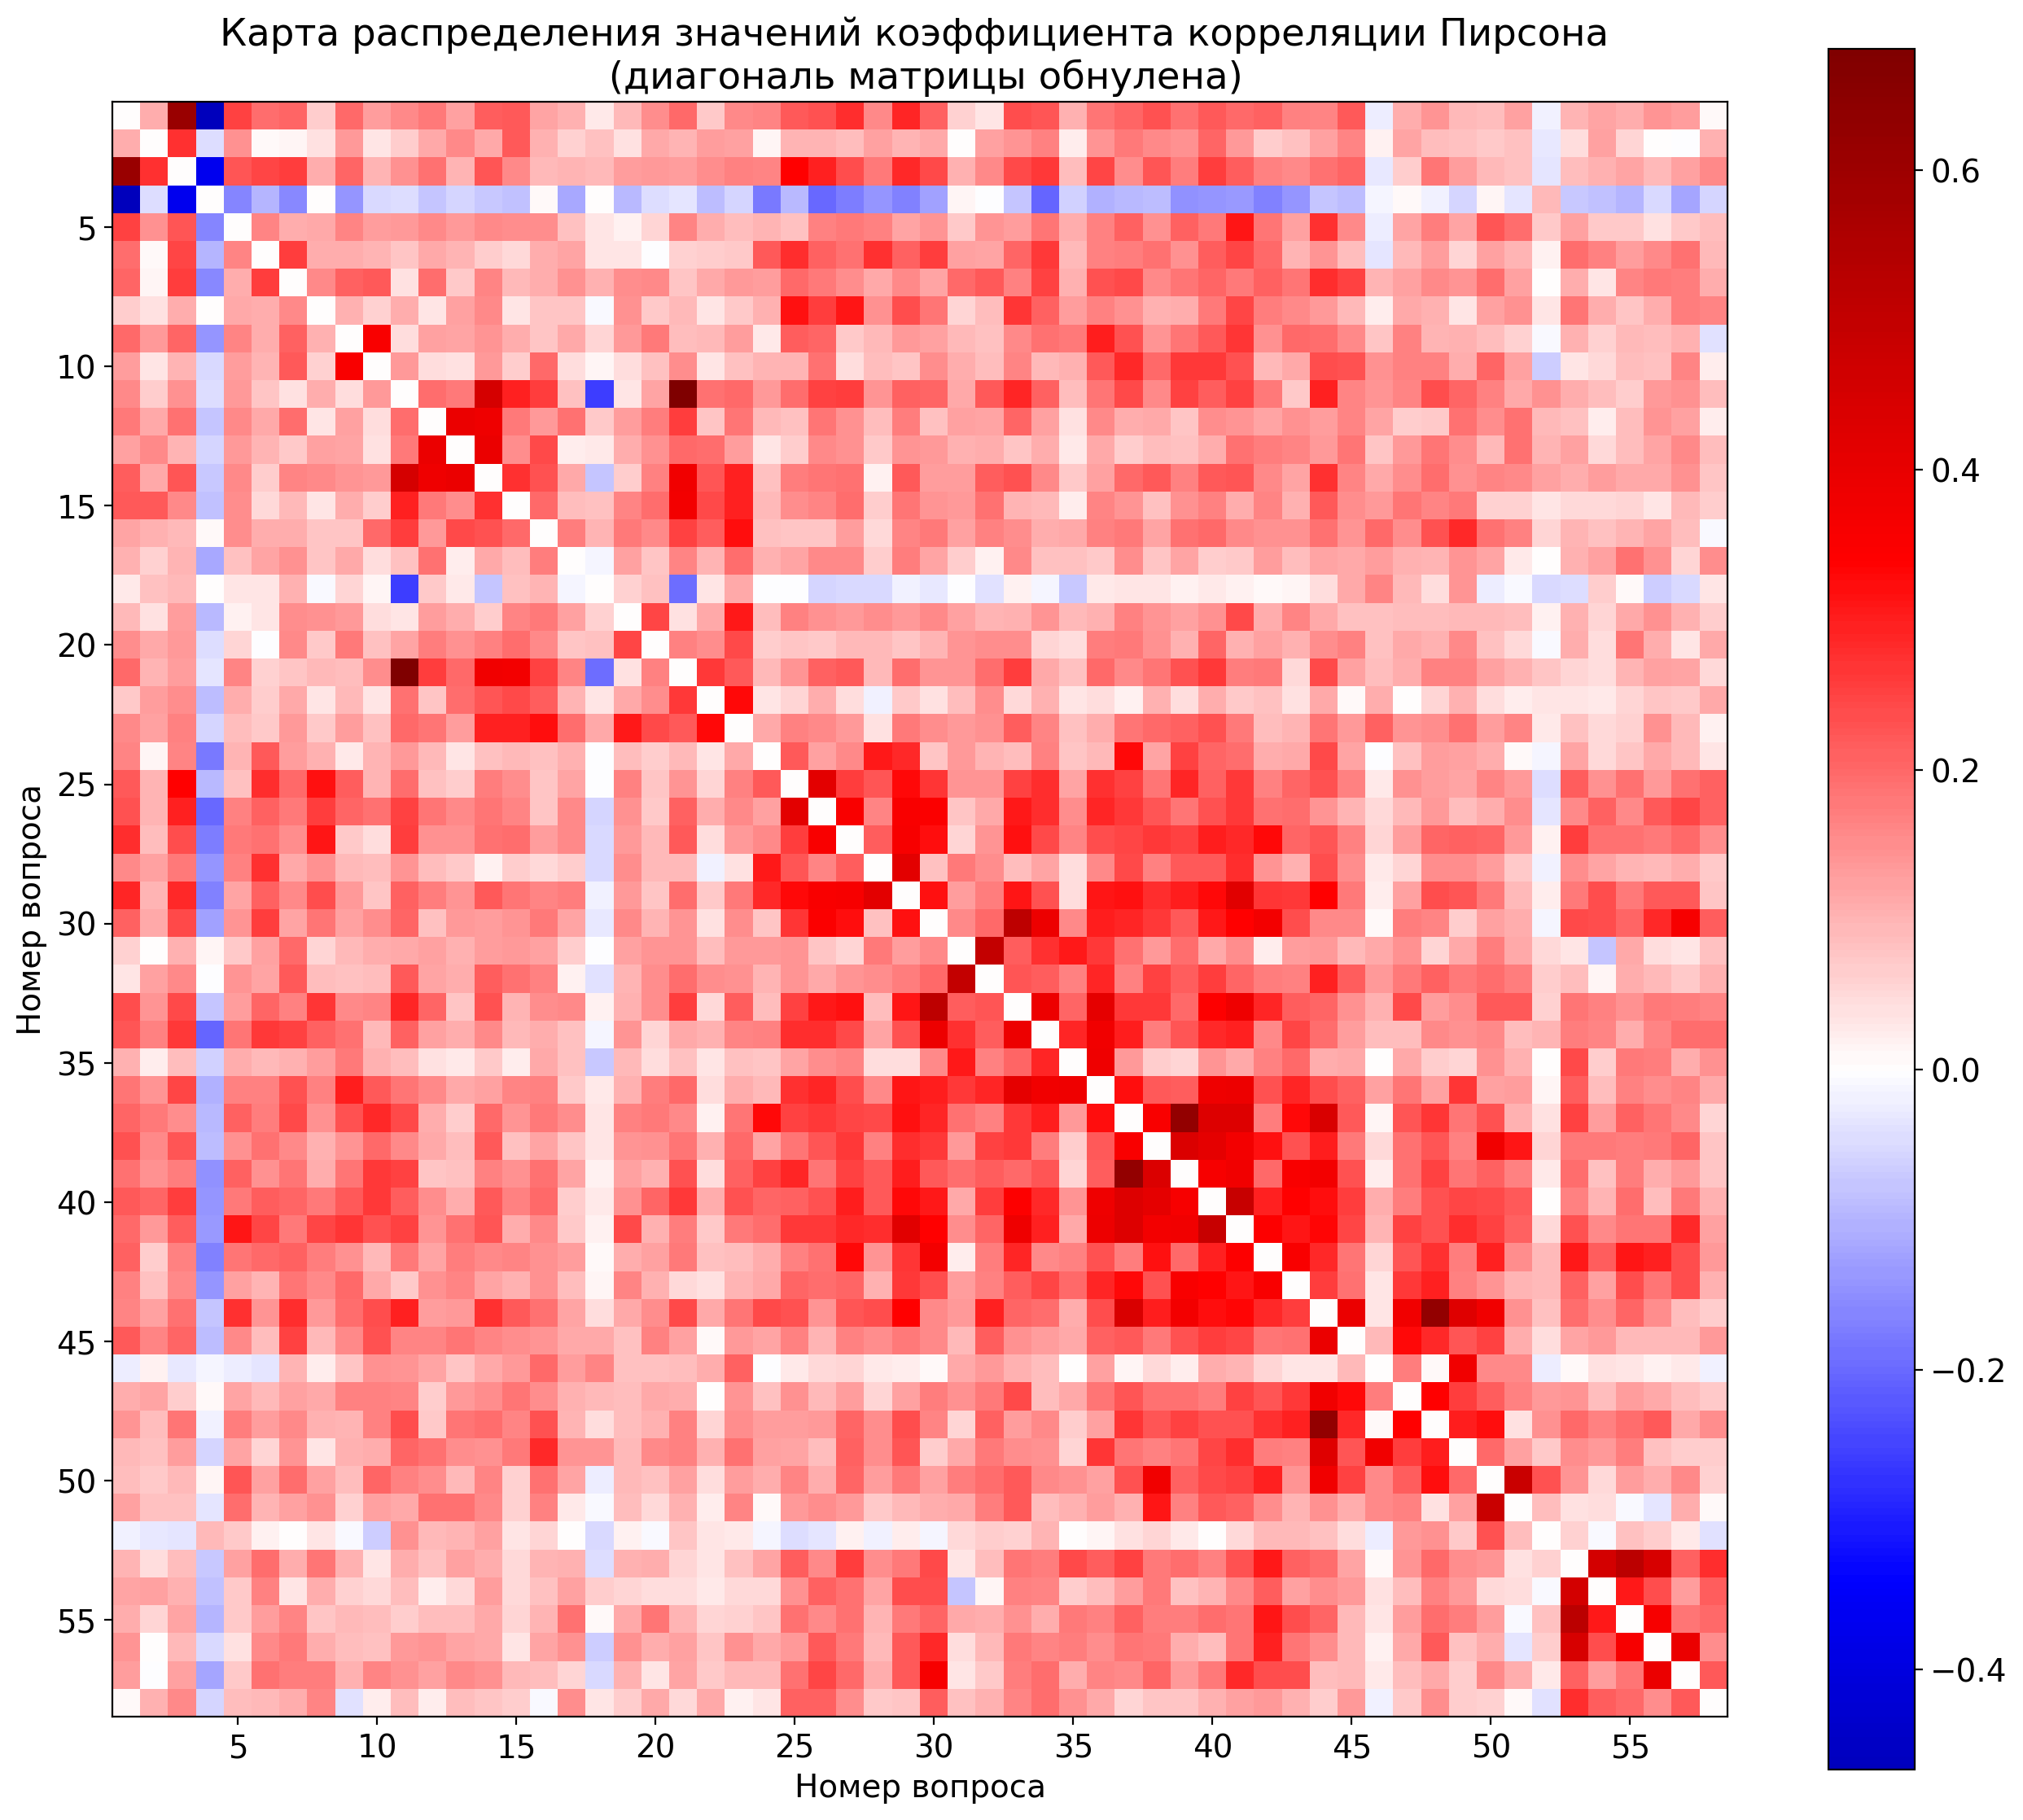

In [41]:
matplotlib.rcParams.update({'font.size': 14})

class MidpointNormalize(mpl.colors.Normalize):
    '''Класс для смещения средней точки цветной шкалы к нулю, т.е. некоррелирующим значениям'''
    def __init__(self, vmin, vmax, midpoint=0, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        normalized_min = max(0, 1 / 2 * (1 - abs((self.midpoint - self.vmin) / (self.midpoint - self.vmax))))
        normalized_max = min(1, 1 / 2 * (1 + abs((self.vmax - self.midpoint) / (self.midpoint - self.vmin))))
        normalized_mid = 0.5
        x, y = [self.vmin, self.midpoint, self.vmax], [normalized_min, normalized_mid, normalized_max]
        return sp.ma.masked_array(sp.interp(value, x, y))
    
def correction_df_corr(df):
    df_corr = df.corr().values
    np.fill_diagonal(df_corr, 0)
    return df_corr

    
def correlation_matrix(df):
    """Функция построения матрицы корреляции"""
    df_corr = correction_df_corr(df)
    
    vmin = df_corr.min().min()
    vmax = df_corr.max().max()
    norm = MidpointNormalize(vmin=vmin, vmax=vmax, midpoint=0)
    
    fig = plt.figure(figsize=(16, 14), dpi= 200, facecolor='w', edgecolor='k')           # создаем изображение
    ax = fig.add_subplot(111)   # оно одно в общей сетке
    #ax.coords.grid(color='yellow', linestyle='solid', alpha=0.5)
    cmap = matplotlib.cm.get_cmap('seismic')    # карта цвета
    
    plt.title('Карта распределения значений коэффициента корреляции Пирсона \n (диагональ матрицы обнулена)')
    plt.xlabel('Номер вопроса')
    plt.ylabel('Номер вопроса')
    plt.xticks(range(4, 58, 5))
    ax.set_xticklabels(range(5, 59, 5))
    plt.yticks(range(4, 58, 5))
    ax.set_yticklabels(range(5, 59, 5))    
    labels = df.columns          # названия строк и стоблцов - маркеры вопросов
    plt.imshow(df_corr, cmap=cmap, norm=norm)
    plt.colorbar()

correlation_matrix(Rm_num)

Отсортируем пары вопросов по значенияю коэффициента Пирсона. Ниже представлены пары вопросом с наиболее высокими значениям $r$:

In [42]:
df_corr = correction_df_corr(Rm_num)

def sorted_indices(ary):
    """Возвращает отсортированный список пар вопросов
    с наибольшими модулями коэффициентов корреляции"""
    n = ary.size
    flat = np.abs(ary).flatten()
    indices = np.argpartition(flat, -n)[-n:]
    indices = indices[np.argsort(-flat[indices])]
    x, y = np.unravel_index(indices, ary.shape)
    return(list(zip(x[::2], y[::2])))   # каждая вторая пара


def most_corr_qs(ind, df_corr, n):
    """Печатает n вопросов с наибольшими (наименьшим) значениями коэффициентов корреляции.
    Для наименьших значений передаем отрицательное n"""
    pattern = "Вопросы {0} и {1}: «{2}» и «{3}», r = {4:.2f}."
    if n > 0:
        for (i, j) in ind[:n]:
            i, j = sorted(tuple((i, j)))
            print(pattern.format(i, j, qs_yn[i+1], qs_yn[j+1], df_corr[i, j]))
    elif n < 0:
        for (i, j) in ind[n:]:
            i, j = sorted(tuple((i, j)))
            print(pattern.format(i, j, qs_yn[i+1], qs_yn[j+1], df_corr[i, j]))
            
# отсортированные несовпадающие пары индексов
ind = [(i, j) for i, j in sorted_indices(df_corr) if i != j]
most_corr_qs(ind, df_corr, 10)

Вопросы 10 и 20: «Возникают ли у вас неприятные, болезненные или необычные физические ощущения?» и «Бывают ли у Вас головные боли?», r = 0.68.
Вопросы 36 и 38: «Замечали ли Вы у себя повышенные тревожность, беспокойство?» и «Испытываете ли Вы тревогу и беспокойство за кого-нибудь или за что-нибудь?», r = 0.63.
Вопросы 43 и 47: «Замечали ли Вы у себя появление навязчивых мыслей, действий или страхов?» и «У Вас бывают навязчивые сомнения в правильности Ваших поступков или решений?», r = 0.63.
Вопросы 0 и 2: «Возникают ли у Вас проблемы со сном?» и «После сна Вы чувствуете себя усталым и «разбитым» (неотдохнувшим)?», r = 0.61.
Вопросы 52 и 54: «Замечали ли Вы у себя появление проблем коммуникации с другими людьми?» и «Вы чувствуете себя скованно или неуверенно в обществе?», r = 0.52.
Вопросы 29 и 32: «Приходит ли Вам мысль, что в Вашей жизни мало радости и счастья?» и «"Часто я чувствую себя просто скверно"», r = 0.51.
Вопросы 30 и 31: «Легко ли меняется Ваше настроение?» и «Бывает ли Вам

Определим среднее значение модуля коэффициента корреляции между всеми парами вопросов:

$$\overline{r}_{xy} = \frac{1}{m} \sum_{x \neq y}{|r_{xy}|} $$

In [43]:
r_mean = sum([abs(df_corr[i, j]) for i, j in ind])/len(ind)   # неоптимальное решение, но массив невелик
print('Среднее значение |r| между всеми парами вопросов: {:.2f}.'.format(r_mean))

Среднее значение |r| между всеми парами вопросов: 0.15.


Адекватность теста подтверждает тот факт, что наибольшими коэффициентам корреляции обладают пары вопросов из одной группы. Однако больший интерес представляет нахождение коррелирующих пар вопросов из различных групп. Для этого произведем фильтрацию пар, оставив несмежные вопросы:

In [44]:
def ind_filtred(ind):
    """Выкидывает индексы, находящиеся в одной группе"""
    new_ind = []
    for i, j in ind:
        if C['Категория вопроса'][i+1] != C['Категория вопроса'][j+1]:
            new_ind.append((i, j))
    return new_ind

ind_f = ind_filtred(ind)
most_corr_qs(ind_f, df_corr, 10)

Вопросы 36 и 43: «Замечали ли Вы у себя повышенные тревожность, беспокойство?» и «Замечали ли Вы у себя появление навязчивых мыслей, действий или страхов?», r = 0.44.
Вопросы 28 и 40: «Чувствуете иногда ли Вы себя подавленным и угнетенным?» и «"У меня бывает гнетущее состояние"», r = 0.42.
Вопросы 35 и 40: «"Я довольно нервный"» и «"У меня бывает гнетущее состояние"», r = 0.39.
Вопросы 35 и 39: «"Я довольно нервный"» и «Бывает ли у Вас ощущение постоянного напряжения?», r = 0.38.
Вопросы 32 и 40: «"Часто я чувствую себя просто скверно"» и «"У меня бывает гнетущее состояние"», r = 0.38.
Вопросы 37 и 49: «Бывает ли у Вас ощущение какого-то беспокойства (как будто что-то должно случиться), хотя особых причин и нет?» и «Испытываете ли Вы иногда чувство страха даже при отсутствии реальной опасности?», r = 0.37.
Вопросы 38 и 43: «Испытываете ли Вы тревогу и беспокойство за кого-нибудь или за что-нибудь?» и «Замечали ли Вы у себя появление навязчивых мыслей, действий или страхов?», r = 0.37.


# Проверка шкал

Гипотеза: два некоррелирующих вопроса должны иметь ненулевые баллы в разных шкалах, то есть, отсутствие корреляции в матрице $R$ влечет за собой отсутствие корреляции в матрице $С$.

**Результаты**: 
- 30% студентов подвержены невротическим расстройствам максимально подвержены студенты-медики 5, 6 курсов;
- основные причины: 1) повышенная учебная нагрузка и переутомление; 2) личные причины, не связанные с учебой; 3) экзамены; 4) неопределенность будущей карьеры;
- факт совмещения учебы с работой играет незначительную роль в развитии невротических расстройств для студентов-медиков, и даже, возможно, оказывает положительное воздействие на психическое состояние студентов старших курсов;
- студенты ощущают психический дискомфорт, но только треть из них реализовали потребность в обращении к психиатру или психотерапевту.

**Вывод**: 

Чтобы не допускать у обучающихся развития психических расстройств, служба психологической поддержки в учебных заведениях должна стать доступнее и активнее проводить работу со студентами.



# Литература

1. Казаковцев Б.А., Голланд В.Б. Психические расстройства и расстройства поведения (F00 – F99) (Класс V МКБ 10, адаптированный для использования в Российской Федерации). /М.: Минздрав России. — 1998. — С. 138–145.
2. Алгоритмы диагностики тревожных расстройств невротического уровня (панического, генерализованного тревожного и тревожно-фобических расстройств): методические рекомендации / НМИЦ ПН им. В.М. Бехтерева; авторы-сост.: Караваева Т.А., Васильева А.В., Мизинова Е.Б., Белан Р.М., Моргачева Т.В., Гужева О.Б. – СПб, 2018. – 40 с.
3. Поздняк, Вера Владимировна. Медицинская психология в курсе психиатрии: учебное пособие / В. В. Поздняк, С. В. Гречаный, А. Б. Ильичев ; М-во здравоохранения Рос. Федерации, С.-Петерб. гос. педиатр. мед. ун-т. - Санкт-Петербург : СПбГПМУ, 2018. - 71 с. - (Библиотека Педиатрического университета). - 100 экз. - ISBN 978-5-907065-21-5 (в обл)
4. Сара Бослаф. Статистика для всех. / Пер. с англ. П. А. Волкова, И. М. Флямер, М. В. Либерман, А. А. Галицына. – М.: ДМК Пресс, 2015.